# 1. Perkenalan

Halo, nama saya Fauzan Nurachman atau bisa dipanggil Ojan dari batch FTDS 003

# Problems

### Problem 1

a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

c. Mengapa cosine similarity harus melibatkan vektor bukan matriks?

### Problem 2

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

# 3. Import pustaka yang dibutuhkan

Kita akan menggunakan import file numpy, pandas, matplotlib, scipy, dan seaborn.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

# 4. Data Loading

### Problem 1

Kita akan buat terlebih dahulu vektor yang nantinya kita olah menjadi data.

In [43]:
# Kalimat 1: Julie loves me more than Linda loves me
# Kalimat 2: Jane likes me more than Julie loves me

kalimat_1 = np.array([2, 0, 1, 1, 0, 2, 1, 1])
kalimat_2 = np.array([2, 1, 1, 0, 1, 1, 1, 1])

dot_product = kalimat_1 @ kalimat_2
cosine_sim = dot_product/(np.linalg.norm(kalimat_1) * np.linalg.norm(kalimat_2))

print('Dot Product:',dot_product)
print('Cosine Similarity:',cosine_sim)

Dot Product: 9
Cosine Similarity: 0.8215838362577491


### 5. Mathematical Calculation

a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

iya, karena kita dapat lihat hasil cosine similarity mencapai 82% yang berarti kalimat 1 dengan kalimat 2 hampir memiliki kesamaan / kemiripan sebanyak 82%. Semakin mendekati 1 / 100%, semakin mirip antar kalimat tersebut.

b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

In [44]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

In [45]:
cos_theta = kalimat_1 @ kalimat_2 / (np.linalg.norm(kalimat_1) * np.linalg.norm(kalimat_2))
cos_theta

0.8215838362577491

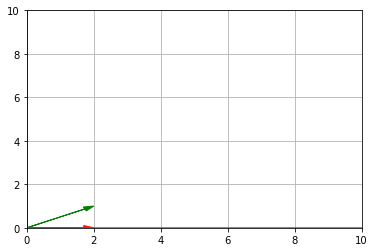

In [46]:
kalimat_1 = np.array([2, 0, 1, 1, 0, 2, 1, 1])
kalimat_2 = np.array([2, 1, 1, 0, 1, 1, 1, 1])

plot_vector2d(kalimat_1, color='r')
plot_vector2d(kalimat_2, color='g')

plt.axis([0, 10, 0, 10])  # rentang axis x dan y
plt.axvline(0)              # garis y = 0
plt.axhline(0)              # garis x = 0
plt.grid()
plt.show()

Jika kita lihat dari koordinat kartesian, yang dikatakan cosine similarity 0 yaitu garis antar vektor itu saling berjauhan (dengan sudut 90 derajat), kemudian dikatakan cosine similarity 1 yaitu garis antar vektor itu saling bersamaan sehinggu membentuk garis titik koordinat yang sama. Pada gambar tersebut kalimat 1 berada pada garis lurus horizontal berwarna merah, kemudian kalimat 2 berada mendekati kalimat 1 sehingga dapat dikatakan bahwa kalimat 1 dengan kalimat 2 hampir memiliki persamaan.

c. Mengapa cosine similarity harus melibatkan vektor bukan matriks?

Karena vektor berbentuk 1 dimensi yang dimana untuk mendapatkan koordinat harus menggunakan vector, jika matrix berbentuk 2 dimensi yang dimana koordinat tidak menerima matrix.

### Problem 2

Setelah kami mengimpor library, kami mencari data yang kami butuhkan di Big Query Google Cloud Platform. Kemudian kita mencari himpunan data dari database yang tersedia di bigquery-public-data.austin_waste.waste_and_diversion. Setelah itu kita mengambil dataset yang kita butuhkan dengan query seperti ini:

SELECT sale_dollars
FROM `bigquery-public-data.iowa_liquor_sales.sales` 
LIMIT 5000

Dari data ini, kita akan mengambil sale_dollars.
Setelah itu, kami mengimpor data ke file .csv mengunduh di Google Cloud Platform ke notebook ini. Setelah itu kita menetapkan variabel ke DataFrame atau df untuk terus memproses data.

In [47]:
df=pd.read_csv('/content/h8dsft_P0LC2_Fauzan_Nurachman.csv')
df

,sale_dollars
0,7.40
1,7.40
2,7.40
3,7.40
4,7.40
...,...
4995,98.88
4996,99.00
4997,98.88
4998,92.40


### 5. Mathematical Calculation

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

Sebelum kita lakukan pengecekan Central Tencency, kita lakukan pengecekan data tersebut, mulai dari ada berapa bari dan kolom, kemudian tipe datanya dan apakah ada missing value atau tidak.

In [48]:
df.shape

(5000, 1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_dollars  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [50]:
df.isna().sum()

sale_dollars    0
dtype: int64

Kita dapat lihat bahwa dataset ini memiliki 5000 baris dan 1 kolom, kemudian tipe datanya float, dan tidak ada missing value.

Sesudah itu kita lanjutkan dengan mencari mean, median, dan mode sebelum dihilangkan data outliers.

In [51]:
sale_dollars_mean = df['sale_dollars'].mean()
sale_dollars_mean

347.98057800000004

In [52]:
sale_dollars_median = df['sale_dollars'].median()
sale_dollars_median

230.88

In [53]:
sale_dollars_mode = df['sale_dollars'].mode()
sale_dollars_mode

0    129.6
dtype: float64

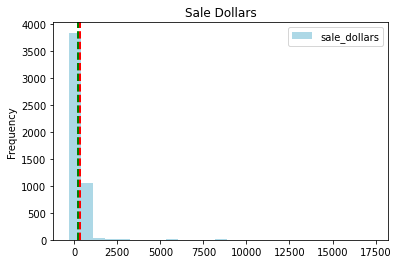

In [54]:
df.plot.hist(title='Sale Dollars', color='lightblue', bins=25)  
plt.axvline(df['sale_dollars'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['sale_dollars'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Dari code dan tampilan visual diatas, kita dapat lihat bahwa nilai mean sale_dollars yaitu 347.98, kemudian nilai median yaitu 230.88 dan nilai mode yaitu 129.6 . Kemudian nilai mean dan median tidak terlalu jauh. Pemusatan data terletak pada range 0 - 800 dengan frekuensi hampir 4000.

2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!

Kita akan lakukan pengecekan data apakah skew atau normal. Kita masukan fungsi .skew() .

In [55]:
df['sale_dollars'].skew()

12.177189970386195

Dapat kita ketahui bahwa data yang kita punya yaitu skew, kemudian data itu right skew karena hasil dari menggunakan fungsi .skew() yaitu 12.17 yang dimana semakin besar nilai skew akan mengarah ke right skew, jika nilai skew itu minus akan mengarah ke left skew. Setelah itu kita akan lakukan uji lanjutan dengan menggunakan extreme value analisis.

3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

Saya akan menggunakan teknik Tukey's rule for Outlier Detection dikarenakan data ini merupakan data skew lebih tepatnya right skew, jadi kita lakukan teknik Tukey's rule untuk mendapatkan outliers.

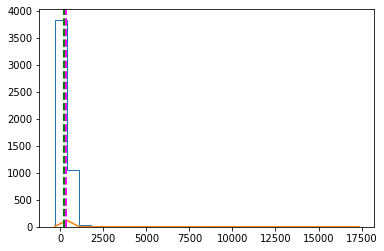

In [56]:
sale_dollars = df['sale_dollars']
density = stats.gaussian_kde(sale_dollars)
n, x, _ = plt.hist(sale_dollars, histtype='step', bins=25)  
plt.plot(x, density(x)*10**5)
plt.axvline(sale_dollars.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(sale_dollars.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

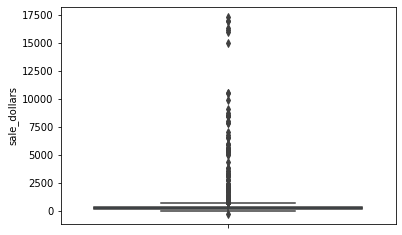

In [57]:
sns.boxplot(data=df, y = 'sale_dollars');

Kita dapat lihat bahwa banyak sekali nilai outliers dengan kita menggunakan teknik Tukey's rule. Dengan arti data tersebut distribusinya tidak normal. Kita akan menghilangkan data outliers dan kemudian kita coba kembali apakah data outliers sudah hilang atau belum.

Pertama kita cari varian dan standar deviasi sebelum mencari batas atas dan batas bawah untuk mengetahui outliers yang paling atas dan paling bawah.

In [58]:
df['sale_dollars'].var()

775871.689074941

In [59]:
sale_dollars_std = df['sale_dollars'].std()
sale_dollars_std

880.8357900738031

In [60]:
outliers_plus = sale_dollars_mean + 3*sale_dollars_std
outliers_plus

2990.4879482214096

In [61]:
outliers_minus = sale_dollars_mean - 3*sale_dollars_std
outliers_minus

-2294.5267922214093

Setelah kita dapat standar deviasi, kemudian kita cari batas atas dan batas bawah, kemudian kita lakukan pencarian ada berapa baris outliers dengan menggunakan formula ini:

In [62]:
df1 = df.loc[df['sale_dollars'] > 2990.48]
df1

,sale_dollars
4127,6546.96
4138,5364.00
4139,17352.00
4140,16308.00
4142,4368.00
4143,7995.00
4144,7830.00
4145,8541.00
4146,8766.00
4148,8502.00


In [63]:
df1.value_counts().sum()

53

In [65]:
df.loc[df['sale_dollars'] < -2294.52]

,sale_dollars


Dapat kita ketahui pada batas atas terdapat 53 baris data outliers, sedangkan untuk data bawah tidak ada data outliers.

Kemudian kita akan drop baris sesuai index untuk mendapatkan data yang sudah tidak ada outliers.

In [66]:
df.drop(index = [4127,4138,4139,4140,4142,4143,4144,4145,4146,4148,
                 4149,4150,4151,4163,4164,4165,4166,4167,4168,4169,
                 4170,4171,4172,4173,4174,4175,4176,4178,4179,4185,
                 4186,4187,4188,4190,4191,4192,4193,4195,4196,4197,
                 4198,4199,4200,4201,4202,4203,4204,4205,4206,4207,4208,4209,4210], inplace=True)

Sesudah kita drop, kita coba lihat lagi apakah sudah tidak ada outliers atau belum.

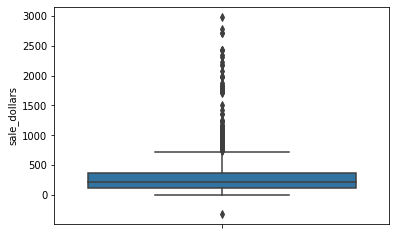

In [67]:
sns.boxplot(data=df, y = 'sale_dollars');

Ternyata masih banyak outliers disana, kita bisa kecilkan lagi nilai pembaginya pada batas bawah dan batas atas, namun ini sudah mewakili bahwa kita dapat mengurangi nilai outliers.

### 6. Hasil

Problem 1 : 

a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

Iya, karena kita dapat lihat hasil cosine similarity mencapai 82% yang berarti kalimat 1 dengan kalimat 2 hampir memiliki kesamaan / kemiripan sebanyak 82%. Semakin mendekati 1 / 100%, semakin mirip antar kalimat tersebut.

b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

Jika kita lihat dari koordinat kartesian, yang dikatakan cosine similarity 0 yaitu garis antar vektor itu saling berjauhan (dengan sudut 90 derajat), kemudian dikatakan cosine similarity 1 yaitu garis antar vektor itu saling bersamaan sehinggu membentuk garis titik koordinat yang sama. Pada gambar tersebut kalimat 1 berada pada garis lurus horizontal berwarna merah, kemudian kalimat 2 berada mendekati kalimat 1 sehingga dapat dikatakan bahwa kalimat 1 dengan kalimat 2 hampir memiliki persamaan.

c. Mengapa cosine similarity harus melibatkan vektor bukan matriks?

Karena vektor berbentuk 1 dimensi yang dimana untuk mendapatkan koordinat harus menggunakan vector, jika matrix berbentuk 2 dimensi yang dimana koordinat tidak menerima matrix.

Problem 2 ;

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

Dari code dan tampilan visual diatas, kita dapat lihat bahwa nilai mean sale_dollars yaitu 347.98, kemudian nilai median yaitu 230.88 dan nilai mode yaitu 129.6 . Kemudian nilai mean dan median tidak terlalu jauh. Pemusatan data terletak pada range 0 - 800 dengan frekuensi hampir 4000.

2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya.

Dapat kita ketahui bahwa data yang kita punya yaitu skew, kemudian data itu right skew karena hasil dari menggunakan fungsi .skew() yaitu 12.17 yang dimana semakin besar nilai skew akan mengarah ke right skew, jika nilai skew itu minus akan mengarah ke left skew. Setelah itu kita akan lakukan uji lanjutan dengan menggunakan extreme value analisis.

3. Apakah datanya skew atau normal? jelaskan jawabanmu!
Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

Kita dapat lihat bahwa banyak sekali nilai outliers dengan kita menggunakan teknik Tukey's rule. Dengan arti data tersebut distribusinya tidak normal. Kemudian kita lakukan penghilangan outliers dan hasilnya baik. Mungkin perlu penggantian nilai 3 menjadi 1.5 pada rumus pencarian batas atas dan batas bawah agar hasilnya lebih banyak nilai outliers yang keluar.

# Terima kasih